In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [2]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec
import matplotlib.ticker as ticker
import seaborn as sns
from figure_dict import *
from uncertainties import ufloat
from uncertainties import umath
from uncertainties.umath import *
from uncertainties import unumpy
from decimal import Decimal
from scipy import stats
import math

import matplotlib as mpl
from matplotlib import cm
import matplotlib.colors as mcolors
from matplotlib.colors import ListedColormap, LogNorm
%matplotlib inline 
plt.style.use('figures')
####C:\ProgramData\Anaconda2\Lib\site-packages\matplotlib\mpl-data\stylelib


In [3]:
## fitness data
fin = "input/GrowthAssay/SsMutant.xlsx"
xls = pd.ExcelFile(fin)
#cols = mutant, selection coef
rep1 = xls.parse("rep1-norm") 
rep2 = xls.parse("rep2-norm") 
rep3 = xls.parse("rep3-norm") 

In [4]:
## output plots
dirOut = "output/GrowthAssay/"
selecoeffcolTable = dirOut+'Fitness-sele-coef-col.csv' 
selecoeffTable  = dirOut+'Fitness-sele-coef.csv' 
avgGrowthTable = dirOut+'Fitness-avg-growthCurve.csv' 
selecoeffPlot  = dirOut+'Fitness-sele-coef.pdf' 
avgGrowthPlot = dirOut+'Fitness-avg-growthCurve.pdf' 

dirOut = "output/GrowthAssay/12mut-"
selecoeffcolTable = dirOut+'Fitness-sele-coef-col.csv' 
selecoeffTable  = dirOut+'Fitness-sele-coef.csv' 
avgGrowthTable = dirOut+'Fitness-avg-growthCurve.csv' 
selecoeffPlot  = dirOut+'Fitness-sele-coef.pdf' 
avgGrowthPlot = dirOut+'Fitness-avg-growthCurve.pdf' 


In [5]:
def transposeDF(df):
    df_T = df.T
    df_T.columns = df_T.iloc[0]
    df_T = df_T[1:]
    df_T.index.names = [labeldict["Time"]]
    return df_T  

In [6]:
r1 = transposeDF(rep1)
r2 = transposeDF(rep2)
r3 = transposeDF(rep3)

In [7]:
## read in replicate data
dfs = {}
dfs[0] = r1
dfs[1] = r2
dfs[2] = r3

dfpanel = pd.Panel(dfs)
dfpanel

<class 'pandas.core.panel.Panel'>
Dimensions: 3 (items) x 8 (major_axis) x 15 (minor_axis)
Items axis: 0 to 2
Major_axis axis: 0 to 28
Minor_axis axis: SsWT to Vector

In [8]:
## calculate mean and std of 3 biological replicates 
dfmean = dfpanel.mean(axis=0)
dfstd = dfpanel.std(axis=0)
dfmean = dfmean.drop(['M73A_I107K'], axis = 1)
dfstd = dfstd.drop(['M73A_I107K'], axis = 1)
dfmean

Protein,SsWT,I45A,I45K,S70A,M73A,I107A,I107K,I45A_S70A,I45A_M73A,I45K_S70A,I45K_I107A,I45K_I107K,S70A_I107K,Vector
Time (Hours),,,,,,,,,,,,,,
0,-1.612697,-1.615628,-1.639359,-1.614602,-1.626509,-1.662047,-1.555641,-1.576583,-1.579248,-1.568547,-1.573710,-1.552789,-1.509155,-1.551611
4,-1.093150,-1.108908,-0.988552,-1.061109,-1.185593,-1.106870,-0.893490,-0.994563,-1.121364,-0.957498,-0.895514,-0.932792,-0.855681,-1.345047
8,-0.406089,-0.356073,-0.117299,-0.339712,-0.601796,-0.380362,-0.066461,-0.206526,-0.480667,-0.113728,-0.021959,-0.104798,-0.022603,-1.186786
12,0.862127,1.055865,1.633990,0.999230,0.487998,1.018132,1.796125,1.438466,0.739096,1.617909,1.757202,1.710167,1.786109,-1.061281
16,1.683064,1.856851,2.785508,1.773267,1.333682,1.820965,2.898107,2.613310,1.589837,2.777234,2.894702,2.852594,2.892825,-0.979217
22,3.863891,3.998786,5.151472,3.914037,3.378927,4.006548,5.272437,4.991035,3.767280,5.171340,5.304115,5.262334,5.255578,-0.877345
25,5.150407,5.393407,6.556228,5.239542,4.392505,5.389932,6.718353,6.385559,5.038777,6.590309,6.733687,6.720101,6.706536,-0.912695
28,6.081053,6.299447,7.510880,6.162895,5.048146,6.305562,7.618909,7.365928,5.983042,7.528488,7.648354,7.618801,7.600480,-0.907083


In [9]:
# propagate error of stdev
doubling = unumpy.uarray(dfmean, dfstd)
doubling_u = pd.DataFrame(doubling, index=dfmean.index, columns=dfmean.columns)
doubling_out = pd.DataFrame(index=dfmean.index) 
for col in dfmean:
    print col
    doubling_out[col] = dfmean[col].round(2).map(str) + u'\u00B1' + dfstd[col].round(2).map(str)

SsWT
I45A
I45K
S70A
M73A
I107A
I107K
I45A_S70A
I45A_M73A
I45K_S70A
I45K_I107A
I45K_I107K
S70A_I107K
Vector


In [10]:
## doubling time of WT and mutants 
doubling_out.to_csv(avgGrowthTable, encoding='utf-8-sig', index=True)
doubling_out

,SsWT,I45A,I45K,S70A,M73A,I107A,I107K,I45A_S70A,I45A_M73A,I45K_S70A,I45K_I107A,I45K_I107K,S70A_I107K,Vector
Time (Hours),,,,,,,,,,,,,,
0,-1.61±0.08,-1.62±0.01,-1.64±0.0,-1.61±0.05,-1.63±0.05,-1.66±0.01,-1.56±0.05,-1.58±0.03,-1.58±0.01,-1.57±0.06,-1.57±0.03,-1.55±0.05,-1.51±0.02,-1.55±0.06
4,-1.09±0.06,-1.11±0.02,-0.99±0.01,-1.06±0.03,-1.19±0.02,-1.11±0.02,-0.89±0.02,-0.99±0.04,-1.12±0.01,-0.96±0.02,-0.9±0.04,-0.93±0.04,-0.86±0.03,-1.35±0.02
8,-0.41±0.0,-0.36±0.02,-0.12±0.02,-0.34±0.03,-0.6±0.03,-0.38±0.03,-0.07±0.01,-0.21±0.07,-0.48±0.01,-0.11±0.03,-0.02±0.03,-0.1±0.02,-0.02±0.04,-1.19±0.03
12,0.86±0.06,1.06±0.06,1.63±0.05,1.0±0.06,0.49±0.03,1.02±0.01,1.8±0.05,1.44±0.13,0.74±0.08,1.62±0.11,1.76±0.03,1.71±0.04,1.79±0.09,-1.06±0.04
16,1.68±0.04,1.86±0.03,2.79±0.04,1.77±0.03,1.33±0.05,1.82±0.02,2.9±0.02,2.61±0.12,1.59±0.06,2.78±0.05,2.89±0.01,2.85±0.03,2.89±0.06,-0.98±0.03
22,3.86±0.01,4.0±0.01,5.15±0.04,3.91±0.05,3.38±0.05,4.01±0.01,5.27±0.03,4.99±0.12,3.77±0.07,5.17±0.04,5.3±0.01,5.26±0.02,5.26±0.05,-0.88±0.06
25,5.15±0.05,5.39±0.02,6.56±0.03,5.24±0.06,4.39±0.06,5.39±0.02,6.72±0.01,6.39±0.13,5.04±0.07,6.59±0.03,6.73±0.01,6.72±0.04,6.71±0.05,-0.91±0.04
28,6.08±0.06,6.3±0.02,7.51±0.02,6.16±0.04,5.05±0.04,6.31±0.01,7.62±0.01,7.37±0.09,5.98±0.07,7.53±0.03,7.65±0.0,7.62±0.02,7.6±0.03,-0.91±0.03


In [11]:
## calculate selection coefficient and propagated error 
selecoef = pd.DataFrame(index=dfmean.columns) 
selecoef.index.names = ['Protein']
selecoef_out = pd.DataFrame(index=dfmean.columns, columns=["slope", "doubling_time","r", "std_err" ]) 
selecoef_u = pd.DataFrame(index=dfmean.columns, columns=["slope", "doubling_time","r", "std_err" ]) 


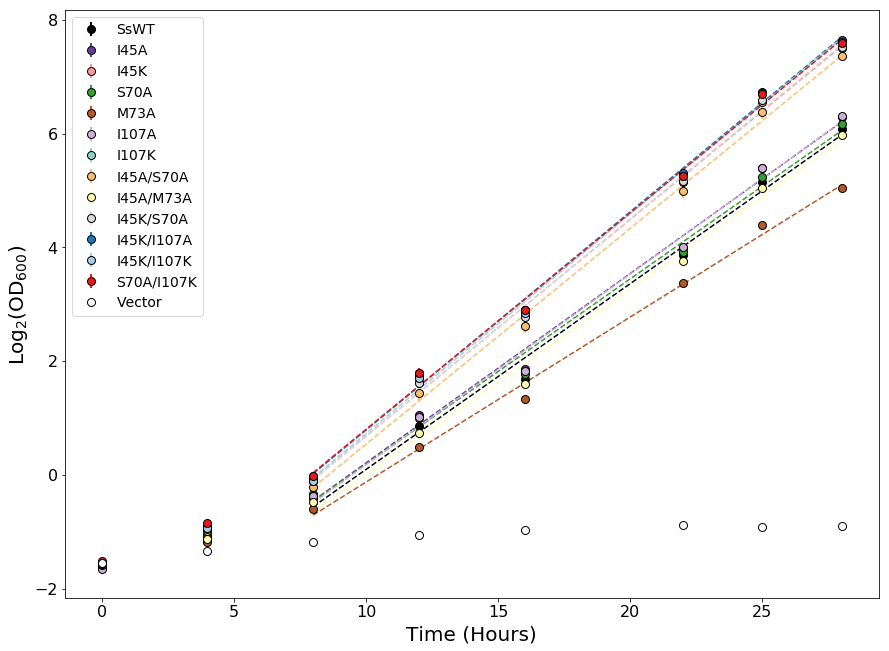

In [12]:
## plot doubling time 

fig = plt.figure(figsize=(figsize["Height"],figsize["Double"])) 
ax1 = plt.subplot()
fig_title =  "Yeast growth curve-SD-TRP+G418+AMP-30C"
sub_title = u'error in slope is calculated from stdev of 3 reps'
#plt.suptitle(fig_title)
#ax1.set_title(sub_title, fontsize=12)
ax1.set_xlabel(labeldict["Time"])
ax1.set_ylabel(labeldict["OD600"])


protlist = list(dfmean)
for p in protlist: 	
    y = pd.to_numeric(dfmean[p].values)
    x = pd.to_numeric(dfmean.index.values)
    e = pd.to_numeric(dfstd[p].values)
    ax1.errorbar(x, y, yerr = e, fmt='o', markersize=8, markeredgecolor='black', linewidth='0.8',
                     capsize=0, c= colordictCat[p], label=p, elinewidth = '2')  
    slope = np.empty((3, 1))
    intercept = np.empty((3, 1))
    r_value = np.empty((3, 1))
    p_value = np.empty((3, 1))
    std_err = np.empty((3, 1))
    indexToExclude = [0,1]
        
    for rep in range(3):
        curr_df = dfs[rep] 
        #for calculting doubling time and selec coefficient, exclude the first two time points 

        curr_y = pd.to_numeric(curr_df[p].values)
        curr_x = pd.to_numeric(curr_df.index.values)
        x_trimmed = np.delete(curr_x, indexToExclude)
        y_trimmed = np.delete(curr_y, indexToExclude)
        slope[rep], intercept[rep], r_value[rep], p_value[rep], std_err[rep] = stats.linregress(x_trimmed, y_trimmed)

    x_trimmed = np.delete(x, indexToExclude)
    y_trimmed = np.delete(y, indexToExclude)
                                  
    selecoef_out.at[p, "slope"]         = str('{:0.3f}'.format(np.mean(slope).round(6))) + u'\u00B1' + str('{:0.3f}'.format(np.std(slope).round(6)))
    selecoef_out.at[p, "doubling_time"] = str('{:0.3f}'.format(np.mean(1/slope).round(6))) + u'\u00B1' + str('{:0.3f}'.format(np.std(1/slope).round(6)))
    selecoef_out.at[p, "r"]             = str('{:0.3f}'.format(np.mean(r_value).round(6))) + u'\u00B1' + str('{:0.3f}'.format(np.std(r_value).round(6)))
    selecoef_out.at[p, "std_err"]       = str('{:0.3f}'.format(np.mean(std_err).round(6))) + u'\u00B1' + str('{:0.3f}'.format(np.std(std_err).round(6)))
    selecoef_u.at[p, "slope"] = ufloat( np.mean(slope), np.std(slope)) 
    selecoef_u.at[p, "doubling_time"] = ufloat( np.mean(1/slope), np.std(1/slope)) 
    selecoef_u.at[p, "r"] = ufloat( np.mean(r_value), np.std(r_value)) 
    selecoef_u.at[p, "std_err"] = ufloat( np.mean(std_err), np.std(std_err)) 
    selecoef.at[p, "slope"] = np.mean(slope)
    selecoef.at[p, "slope_std"] = np.std(slope)
    selecoef.at[p, "doubling_time"] = np.mean(1/slope).round(6)
    selecoef.at[p, "doubling_std"] = np.std(1/slope).round(6)
    selecoef.at[p, "r"] = np.mean(r_value).round(6)
    selecoef.at[p, "r_std"] = np.std(r_value).round(6)
    selecoef.at[p, "std_err"] = np.mean(std_err).round(6)
    selecoef.at[p, "std_err_std"] = np.std(std_err).round(6)       
    line = np.mean(slope)*x_trimmed+np.mean(intercept)
    ax1.plot(x_trimmed,line, "--", c= colordictCat[p])

handles, labels = ax1.get_legend_handles_labels()
labels = [w.replace('_', '/') for w in labels]
ax1.xaxis.labelpad = 5
#plt.colorbar(fig,ax=ax1)
#lgd = ax1.legend(handles, labels, loc='upper left', bbox_to_anchor=(1, 1), numpoints = 1 )
lgd = ax1.legend(handles, labels, loc='upper left', bbox_to_anchor=(0, 1), numpoints = 1 )

#lgd.get_frame().set_linewidth(0.0)
fig.savefig(avgGrowthPlot)
#fig.show()

error in slope is calculated from stdev of 3 reps, not error of fit 

In [13]:
selecoef_u["fitness"] = selecoef_u["slope"]/selecoef_u.at["SsWT", "slope"]
selecoef_u["selecoef"] = -(selecoef_u["fitness"]-1)/(selecoef_u.at["Vector", "fitness"]-1)


In [14]:
def propagateErrorDFFormatted(unumpyarray, df, colname):
    #unumpyarray = ['{0:0.6f}'.format(i) for i in unumpyarray]
    tempSeries = pd.Series(unumpyarray, name = colname).apply(str)
    tempDF = pd.DataFrame([ x.split('+/-') for x in tempSeries.tolist() ], columns = [colname, colname + '_err'], index = df.index)
    tempDF[colname] = pd.to_numeric(tempDF[colname])
    tempDF[colname + '_err'] = pd.to_numeric(tempDF[colname + '_err'])
    df[colname] = tempDF[colname].round(6).map('{:0.2f}'.format) + u'\u00B1' +  tempDF[colname + '_err'].round(6).map('{:0.3f}'.format)
    return (df)

def propagateErrorDF(unumpyarray, df, colname):
    unumpyarray = ['{:.6f}'.format(i) for i in unumpyarray]
    tempSeries = pd.Series(unumpyarray, name = colname).apply(str)
    tempDF = pd.DataFrame([ x.split('+/-') for x in tempSeries.tolist() ], columns = [colname, colname + '_err'], index = df.index)
    df = df.join(tempDF) 
    return (df)

selecoef_out = propagateErrorDFFormatted(selecoef_u.fitness, selecoef_out, "fitness")
selecoef_out = propagateErrorDFFormatted(selecoef_u.selecoef, selecoef_out, "selecoef")
selecoef = propagateErrorDF(selecoef_u.fitness, selecoef, "fitness")
selecoef = propagateErrorDF(selecoef_u.selecoef, selecoef, "selecoef")


fitness and selecoef err are propagated err 

In [15]:
## compiled growth, fitness, and selection coefficient data 
selecoef_u.head()

,slope,doubling_time,r,std_err,fitness,selecoef
Protein,,,,,,
SsWT,0.3269+/-0.0032,3.059+/-0.030,0.99640+/-0.00029,0.0139+/-0.0007,1.0+/-0,0.0+/-0
I45A,0.3332+/-0.0023,3.001+/-0.020,0.996250+/-0.000035,0.01447+/-0.00016,1.019+/-0.012,0.020+/-0.013
I45K,0.3810+/-0.0006,2.624+/-0.004,0.99878+/-0.00005,0.00943+/-0.00017,1.166+/-0.012,0.173+/-0.012
S70A,0.3260+/-0.0021,3.068+/-0.020,0.99613+/-0.00019,0.01439+/-0.00031,0.997+/-0.012,-0.003+/-0.012
M73A,0.2904+/-0.0016,3.443+/-0.019,0.99762+/-0.00008,0.01004+/-0.00013,0.888+/-0.010,-0.117+/-0.010


In [16]:
display = selecoef.drop(['SsWT', 'Vector'])
display = display.apply(pd.to_numeric)
display["display"]= display.index.str.replace('_','\n')

## Figure 2 - selection coefficient of single and double mutants ##

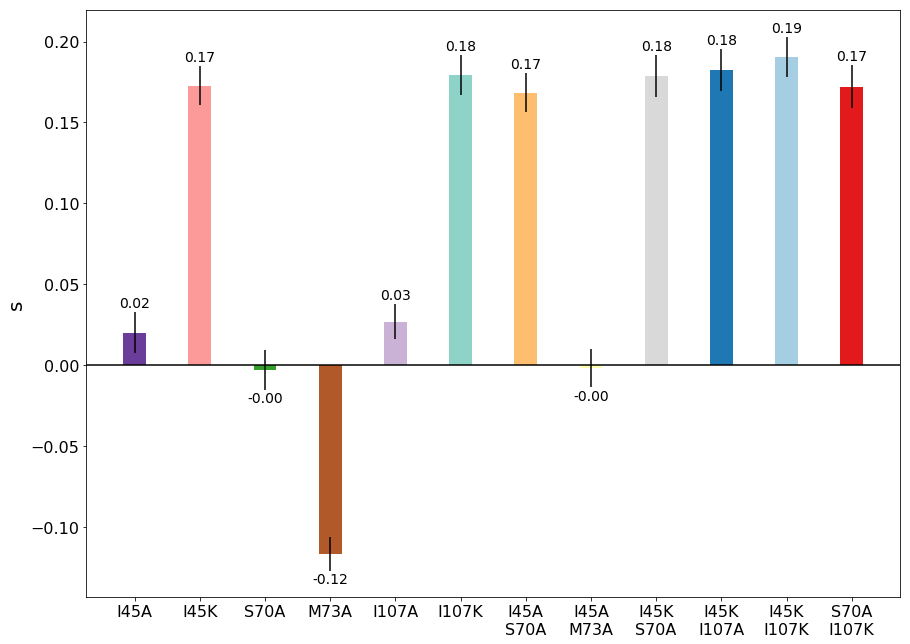

In [17]:
fig = plt.figure(figsize=(figsize["Height"],figsize["Double"])) 
gs = gridspec.GridSpec(nrows=1, ncols=1)
ax = plt.subplot(gs[0])

N = display.shape[0]
ind = np.arange(N)  # the x locations for the groups, exclude wildtype and vector
width = 0.35       # the width of the bars

rects1 = ax.bar(ind, display["selecoef"], width, color=[colordictCat[p] for p in display.index], yerr=display["selecoef_err"])

fig_title = u'Selection coefficient'
sub_title = u'Propagated error from stdev of doubling time of 3 reps'
#plt.suptitle(fig_title)
#ax.set_title(sub_title, fontsize=12)
ax.set_ylabel(labeldict["Selcoeff"])
ax.set_xticks(ind)
ax.set_xticklabels(display.index.str.replace('_','\n'))


def autolabelbar(rects, ddg, err, y_shift):
    for rect, e, h in zip(rects, err, ddg):
        height = h
        if (height >= 0):
            ax.text(rect.get_x() + rect.get_width()/2, height+float(e)+ y_shift, '%.2f' % height, ha='center', va='bottom')
        if (height < 0):
            ax.text(rect.get_x() + rect.get_width()/2, height-float(e)-y_shift, '%.2f' % height, ha='center', va='top')


autolabelbar(rects1, display["selecoef"], display["selecoef_err"], 0.001)

ax.tick_params(axis='both') 
ax.axhline(y=0, color = "black")




In [18]:
print (selecoeffPlot)
fig.savefig(selecoeffPlot)

output/GrowthAssay/12mut-Fitness-sele-coef.pdf
